In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Read input Excel file
input_df = pd.read_excel("Input (1).xlsx")

# Function to extract article text from URL
def extract_article_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    # Extract article title and text (modify these selectors based on the structure of the website)
    title_element = soup.find("h1")
    article_text_elements = soup.find_all("p")

    # Check if title and article_text_elements exist
    if title_element:
        title = title_element.text.strip()
    else:
        title = "No Title Found"  # or whatever default title you want

    if article_text_elements:
        article_text = "\n".join([p.text for p in article_text_elements])
    else:
        article_text = "No Article Text Found"  # or whatever default text you want

    return title, article_text

# Extract article data and store it in a list of dictionaries
article_data_list = []
for index, row in input_df.iterrows():
    url = row["URL"]
    title, article_text = extract_article_text(url)
    article_data_list.append({
        "URL": url,
        "Title": title,
        "ArticleText": article_text
    })

# Convert the list of dictionaries to a Pandas DataFrame
article_df = pd.DataFrame(article_data_list)

# Save the extracted data to a new Excel file (optional)
article_df.to_excel("ExtractedData.xlsx", index=False)

print("Textual data extraction completed.")


Textual data extraction completed.


In [ ]:
df = pd.read_excel("ExtractedData.xlsx")

In [ ]:
df

,URL,Title,ArticleText
0,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...
1,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,Automate the Data Management Process\nRealtime...
2,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,Automate the Data Management Process\nRealtime...
3,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...
4,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...
...,...,...,...
109,https://insights.blackcoffer.com/coronavirus-i...,Coronavirus: Impact on the Hospitality Industry,Automate the Data Management Process\nRealtime...
110,https://insights.blackcoffer.com/coronavirus-i...,Coronavirus impact on energy markets,Automate the Data Management Process\nRealtime...
111,https://insights.blackcoffer.com/what-are-the-...,What are the key policies that will mitigate t...,Automate the Data Management Process\nRealtime...
112,https://insights.blackcoffer.com/marketing-dri...,Marketing Drives Results With A Focus On Problems,Automate the Data Management Process\nRealtime...


In [ ]:
df.isnull().sum()

URL            0
Title          0
ArticleText    0
dtype: int64

In [ ]:
df.shape


(114, 3)

In [ ]:
df.nunique()

URL            114
Title           98
ArticleText    112
dtype: int64

In [ ]:
!pip install tqdm
import re
import string
from tqdm.notebook import tqdm
import dateutil.parser
!pip install pyspellchecker i
from datetime import datetime




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 32.8 MB/s eta 0:00:00


In [ ]:
import nltk
from spellchecker import SpellChecker
from nltk.sentiment.vader import  SentimentIntensityAnalyzer as SIA

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
import random

In [ ]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
languages=stopwords.fileids()
print("number of supported languages:",len(languages))
print("support language",languages)

number of supported languages: 29
support language ['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string

english_stopwords = set(stopwords.words('english'))
hinglish_stopwords = set(stopwords.words('hinglish'))

def clean_title(Title):
    # Remove URL, hashtag, mention, and special characters
    Title = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", Title)
    Title = re.sub(r"[^\w\s]", "", Title)

    # Tokenize the tweet
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tokens = tokenizer.tokenize(Title)

    # Remove stopwords for English and Hinglish
    tokens = [token for token in tokens if token not in english_stopwords and token not in hinglish_stopwords]

    # Remove punctuation and convert to lowercase
    tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]
    tokens = [token.lower() for token in tokens]

    # Join tokens back into a string
    cleaned_title = ' '.join(tokens)
    return cleaned_title



In [ ]:
df['cleaned_title'] = df['Title'].apply(clean_title)

In [ ]:
df.head()

,URL,Title,ArticleText,cleaned_title
0,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,rise telemedicine impact livelihood 2040
1,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,Automate the Data Management Process\nRealtime...,rise ehealth impact humans year 2030
2,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,Automate the Data Management Process\nRealtime...,rise ehealth impact humans year 2030
3,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,rise telemedicine impact livelihood 2040
4,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,rise telemedicine impact livelihood 2040


In [ ]:
df.tail()

,URL,Title,ArticleText,cleaned_title
109,https://insights.blackcoffer.com/coronavirus-i...,Coronavirus: Impact on the Hospitality Industry,Automate the Data Management Process\nRealtime...,coronavirus impact hospitality industry
110,https://insights.blackcoffer.com/coronavirus-i...,Coronavirus impact on energy markets,Automate the Data Management Process\nRealtime...,coronavirus impact energy markets
111,https://insights.blackcoffer.com/what-are-the-...,What are the key policies that will mitigate t...,Automate the Data Management Process\nRealtime...,key policies mitigate impacts covid 19 world work
112,https://insights.blackcoffer.com/marketing-dri...,Marketing Drives Results With A Focus On Problems,Automate the Data Management Process\nRealtime...,marketing drives results focus problems
113,https://insights.blackcoffer.com/continued-dem...,Continued Demand for Sustainability,Automate the Data Management Process\nRealtime...,continued demand sustainability


In [ ]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove leading and trailing whitespaces
    cleaned_text = text.strip()
    return cleaned_text


In [ ]:
df.cleaned_title=df.cleaned_title.apply(lambda x:clean_text(x))

In [ ]:
df.head()

,URL,Title,ArticleText,cleaned_title
0,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,rise telemedicine impact livelihood 2040
1,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,Automate the Data Management Process\nRealtime...,rise ehealth impact humans year 2030
2,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,Automate the Data Management Process\nRealtime...,rise ehealth impact humans year 2030
3,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,rise telemedicine impact livelihood 2040
4,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,rise telemedicine impact livelihood 2040


In [ ]:

def clean_Article(ArticleText):
    # Remove URL, hashtag, mention, and special characters
    ArticleText = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", ArticleText)
    ArticleText = re.sub(r"[^\w\s]", "", ArticleText)

    # Tokenize the article text
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tokens = tokenizer.tokenize(ArticleText)

    # Remove stopwords for English and Hinglish
    tokens = [token for token in tokens if token not in english_stopwords and token not in hinglish_stopwords]

    # Remove punctuation and convert to lowercase
    tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]
    tokens = [token.lower() for token in tokens]

    # Join tokens back into a string
    cleaned_Article = ' '.join(tokens)
    return cleaned_Article




In [ ]:
df['cleaned_Article'] = df['ArticleText'].apply(clean_Article)


In [ ]:
df

,URL,Title,ArticleText,cleaned_title,cleaned_Article
0,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,rise telemedicine impact livelihood 2040,automate data management process realtime kiba...
1,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,Automate the Data Management Process\nRealtime...,rise ehealth impact humans year 2030,automate data management process realtime kiba...
2,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,Automate the Data Management Process\nRealtime...,rise ehealth impact humans year 2030,automate data management process realtime kiba...
3,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,rise telemedicine impact livelihood 2040,automate data management process realtime kiba...
4,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,rise telemedicine impact livelihood 2040,automate data management process realtime kiba...
...,...,...,...,...,...
109,https://insights.blackcoffer.com/coronavirus-i...,Coronavirus: Impact on the Hospitality Industry,Automate the Data Management Process\nRealtime...,coronavirus impact hospitality industry,automate data management process realtime kiba...
110,https://insights.blackcoffer.com/coronavirus-i...,Coronavirus impact on energy markets,Automate the Data Management Process\nRealtime...,coronavirus impact energy markets,automate data management process realtime kiba...
111,https://insights.blackcoffer.com/what-are-the-...,What are the key policies that will mitigate t...,Automate the Data Management Process\nRealtime...,key policies mitigate impacts covid 19 world work,automate data management process realtime kiba...
112,https://insights.blackcoffer.com/marketing-dri...,Marketing Drives Results With A Focus On Problems,Automate the Data Management Process\nRealtime...,marketing drives results focus problems,automate data management process realtime kiba...


In [ ]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove leading and trailing whitespaces
    cleaned_Article = text.strip()
    return cleaned_Article

In [ ]:
df.cleaned_Article=df.cleaned_Article.apply(lambda x:clean_text(x))

In [ ]:
df.head()

,URL,Title,ArticleText,cleaned_title,cleaned_Article
0,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,rise telemedicine impact livelihood 2040,automate data management process realtime kiba...
1,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,Automate the Data Management Process\nRealtime...,rise ehealth impact humans year 2030,automate data management process realtime kiba...
2,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,Automate the Data Management Process\nRealtime...,rise ehealth impact humans year 2030,automate data management process realtime kiba...
3,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,rise telemedicine impact livelihood 2040,automate data management process realtime kiba...
4,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,rise telemedicine impact livelihood 2040,automate data management process realtime kiba...


In [ ]:
def tokenizatio(text):
  tokens=re.split('W+',text)
  return tokens

In [ ]:
df.cleaned_title=df.cleaned_title.apply(lambda x:tokenizatio(x))

In [ ]:
df.cleaned_title

0             [rise telemedicine impact livelihood 2040]
1                 [rise ehealth impact humans year 2030]
2                 [rise ehealth impact humans year 2030]
3             [rise telemedicine impact livelihood 2040]
4             [rise telemedicine impact livelihood 2040]
                             ...                        
109            [coronavirus impact hospitality industry]
110                  [coronavirus impact energy markets]
111    [key policies mitigate impacts covid 19 world ...
112            [marketing drives results focus problems]
113                    [continued demand sustainability]
Name: cleaned_title, Length: 114, dtype: object

In [ ]:
df.cleaned_Article=df.cleaned_Article.apply(lambda x:tokenizatio(x))

In [ ]:
df.cleaned_Article

0      [automate data management process realtime kib...
1      [automate data management process realtime kib...
2      [automate data management process realtime kib...
3      [automate data management process realtime kib...
4      [automate data management process realtime kib...
                             ...                        
109    [automate data management process realtime kib...
110    [automate data management process realtime kib...
111    [automate data management process realtime kib...
112    [automate data management process realtime kib...
113    [automate data management process realtime kib...
Name: cleaned_Article, Length: 114, dtype: object

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def lemmatizer(telemmatizerxt):
  lemm_text="".join([wordnet_lemmatizer.lemmatize(word) for word in text])
  return lemm_text

In [ ]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

In [ ]:
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=ed6dfc106e8dd91b11c2121a81d59e35bb908abbc904babcc2c99a096329ca13
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langdetect import detect

def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None


In [ ]:
df['language'] = df['cleaned_title'].apply(detect_language)


In [ ]:
df.head()

,URL,Title,ArticleText,cleaned_title,cleaned_Article,language
0,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,[rise telemedicine impact livelihood 2040],[automate data management process realtime kib...,None
1,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,Automate the Data Management Process\nRealtime...,[rise ehealth impact humans year 2030],[automate data management process realtime kib...,None
2,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,Automate the Data Management Process\nRealtime...,[rise ehealth impact humans year 2030],[automate data management process realtime kib...,None
3,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,[rise telemedicine impact livelihood 2040],[automate data management process realtime kib...,None
4,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,[rise telemedicine impact livelihood 2040],[automate data management process realtime kib...,None


In [ ]:
df['language'].value_counts()

Series([], Name: language, dtype: int64)

In [ ]:
# Import pandas library if not already imported
import pandas as pd

# Assuming 'cleaned_title' column contains lists
# Explode the lists into separate rows
exploded_df = df.explode('cleaned_title')

# Get unique values from the exploded column
unique_titles = exploded_df['cleaned_title'].unique()

# Print or use unique_titles as needed
print(unique_titles)


['rise telemedicine impact livelihood 2040'
 'rise ehealth impact humans year 2030'
 'rise chatbots impact customer support year 2040'
 'marketing influence businesses consumers'
 'advertisement increase market value'
 'negative effects marketing society'
 'advertisementmarketing affects business'
 'rising cities impact economy environment infrastructure city life year 2035'
 'rise ott platform impact entertainment industry year 2030'
 'rise electric vehicles impact livelihood 2040'
 'rise electric vehicle impact livelihood year 2040'
 'oil prices year 2040 impact world economy'
 'outlook healthcare year 2040 impact human lives'
 'ai healthcare improve patient outcomes' 'creation taking creator'
 'jobs robots humans future' 'machine replace human future work'
 'ai replace work' 'humans machines evolving work' 'title found'
 'machine learning affect business' 'deep learning impact areas elearning'
 'protect future data privacy'
 'machines ai automations robohuman effective finance banki

In [ ]:
spell=SpellChecker()

In [ ]:
def label_sentiment(x:float):
  if x<-0.05: return 'negative'
  if x>0.35: return 'pasitive'
  return 'natural'

In [ ]:
sia=SIA()

In [ ]:
# Convert all elements to strings
df['cleaned_title'] = df['cleaned_title'].astype(str)

# Now apply the sentiment analysis
df['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(df['cleaned_title'])]
df['overall_sentiment'] = df['sentiment'].apply(label_sentiment)




100%|██████████| 114/114 [00:00<00:00, 7092.64it/s]


In [ ]:
df

,URL,Title,ArticleText,cleaned_title,cleaned_Article,language,sentiment,overall_sentiment
0,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,['rise telemedicine impact livelihood 2040'],[automate data management process realtime kib...,None,0.2023,natural
1,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,Automate the Data Management Process\nRealtime...,['rise ehealth impact humans year 2030'],[automate data management process realtime kib...,None,0.0000,natural
2,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,Automate the Data Management Process\nRealtime...,['rise ehealth impact humans year 2030'],[automate data management process realtime kib...,None,0.0000,natural
3,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,['rise telemedicine impact livelihood 2040'],[automate data management process realtime kib...,None,0.2023,natural
4,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,Automate the Data Management Process\nRealtime...,['rise telemedicine impact livelihood 2040'],[automate data management process realtime kib...,None,0.2023,natural
...,...,...,...,...,...,...,...,...
109,https://insights.blackcoffer.com/coronavirus-i...,Coronavirus: Impact on the Hospitality Industry,Automate the Data Management Process\nRealtime...,['coronavirus impact hospitality industry'],[automate data management process realtime kib...,None,0.0000,natural
110,https://insights.blackcoffer.com/coronavirus-i...,Coronavirus impact on energy markets,Automate the Data Management Process\nRealtime...,['coronavirus impact energy markets'],[automate data management process realtime kib...,None,0.2732,natural
111,https://insights.blackcoffer.com/what-are-the-...,What are the key policies that will mitigate t...,Automate the Data Management Process\nRealtime...,['key policies mitigate impacts covid 19 world...,[automate data management process realtime kib...,None,0.0000,natural
112,https://insights.blackcoffer.com/marketing-dri...,Marketing Drives Results With A Focus On Problems,Automate the Data Management Process\nRealtime...,['marketing drives results focus problems'],[automate data management process realtime kib...,None,0.0000,natural


In [ ]:
df['overall_sentiment'].unique()

array(['natural', 'pasitive', 'negative'], dtype=object)

In [ ]:
df['overall_sentiment'].value_counts()

natural     96
pasitive    10
negative     8
Name: overall_sentiment, dtype: int64

In [ ]:
df1=df[['overall_sentiment','cleaned_title']]

In [ ]:
df1

,overall_sentiment,cleaned_title
0,natural,['rise telemedicine impact livelihood 2040']
1,natural,['rise ehealth impact humans year 2030']
2,natural,['rise ehealth impact humans year 2030']
3,natural,['rise telemedicine impact livelihood 2040']
4,natural,['rise telemedicine impact livelihood 2040']
...,...,...
109,natural,['coronavirus impact hospitality industry']
110,natural,['coronavirus impact energy markets']
111,natural,['key policies mitigate impacts covid 19 world...
112,natural,['marketing drives results focus problems']


In [ ]:
from nltk.tokenize import word_tokenize
# Sample financial text
financial_text = "Your financial text goes here."

# Sample positive and negative dictionaries
positive_words = ["positive", "good", "profit", ...]  # Add positive words to the list
negative_words = ["negative", "loss", "bad", ...]  # Add negative words to the list

# Step 1: Text Preparation
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(financial_text.lower())  # Tokenize and convert to lowercase
cleaned_words = [word for word in word_tokens if word.isalpha() and word not in stop_words]

# Step 2: Positive and Negative Dictionaries
positive_score = sum(1 for word in cleaned_words if word in positive_words)
negative_score = sum(1 for word in cleaned_words if word in negative_words)

# Step 3: Polarity Score Calculation
polarity_score = (positive_score - negative_score) / ((positive_score + negative_score) + 0.000001)

# Step 4: Subjectivity Score Calculation
subjectivity_score = (positive_score + negative_score) / (len(cleaned_words) + 0.000001)

# Results
print("Positive Score:", positive_score)
print("Negative Score:", negative_score)
print("Polarity Score:", polarity_score)
print("Subjectivity Score:", subjectivity_score)


Positive Score: 0
Negative Score: 0
Polarity Score: 0.0
Subjectivity Score: 0.0


In [ ]:
!pip install nltk
!pip install syllable


In [ ]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import cmudict, stopwords

# Download NLTK resources (if not already downloaded)

nltk.download('cmudict')

# Sample financial text
financial_text = "Your financial text goes here."

# Step 1: Text Preparation
stop_words = set(stopwords.words('english'))
sentences = sent_tokenize(financial_text)
word_tokens = word_tokenize(financial_text.lower())  # Tokenize and convert to lowercase
cleaned_words = [word for word in word_tokens if word.isalpha() and word not in stop_words]

[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [ ]:


# Step 2: Average Number of Words Per Sentence
average_words_per_sentence = len(cleaned_words) / len(sentences)

# Step 3: Complex Word Count (words with more than two syllables)
pronouncing_dict = cmudict.dict()
complex_words = [word for word in cleaned_words if len(pronouncing_dict.get(word, [])) > 2]
complex_word_count = len(complex_words)

In [ ]:
complex_word_count

1

In [ ]:

# Step 4: Word Count
word_count = len(cleaned_words)

# Step 5: Syllable Count Per Word
def count_syllables(word):
    return max([len(list(y for y in x if y[-1].isdigit())) for x in pronouncing_dict[word.lower()]])

syllable_count_per_word = [count_syllables(word) for word in cleaned_words]

# Step 6: Personal Pronouns Count
personal_pronouns = ['i', 'we', 'my', 'ours', 'us']
personal_pronoun_count = sum(1 for word in cleaned_words if word in personal_pronouns)

# Step 7: Average Word Length
average_word_length = sum(len(word) for word in cleaned_words) / len(cleaned_words)

# Results
print("Average Number of Words Per Sentence:", average_words_per_sentence)
print("Complex Word Count:", complex_word_count)
print("Word Count:", word_count)
print("Syllable Count Per Word:", syllable_count_per_word)
print("Personal Pronouns Count:", personal_pronoun_count)
print("Average Word Length:", average_word_length)


Average Number of Words Per Sentence: 3.0
Complex Word Count: 1
Word Count: 3
Syllable Count Per Word: [3, 1, 1]
Personal Pronouns Count: 0
Average Word Length: 5.666666666666667


In [ ]:
import wordcloud
import matplotlib.pyplot as plt




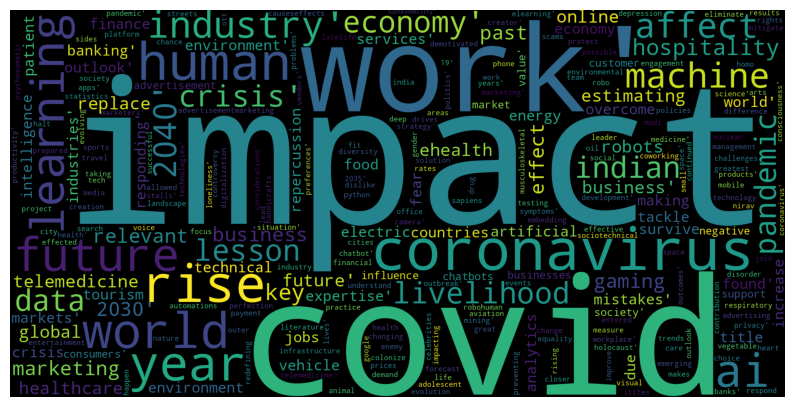

In [ ]:
from wordcloud import WordCloud
data=df['cleaned_title']
plt.figure(figsize=[10,7])
wc=WordCloud(max_words=1000,width=1600,height=800,
             collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

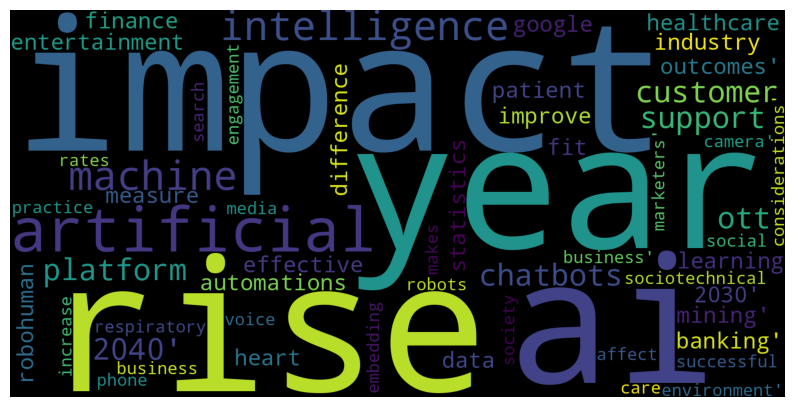

In [ ]:
data=df1[df1['overall_sentiment']=='pasitive']['cleaned_title']
plt.figure(figsize=[10,7])
wc=WordCloud(max_words=1000,width=1600,height=800,
             collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

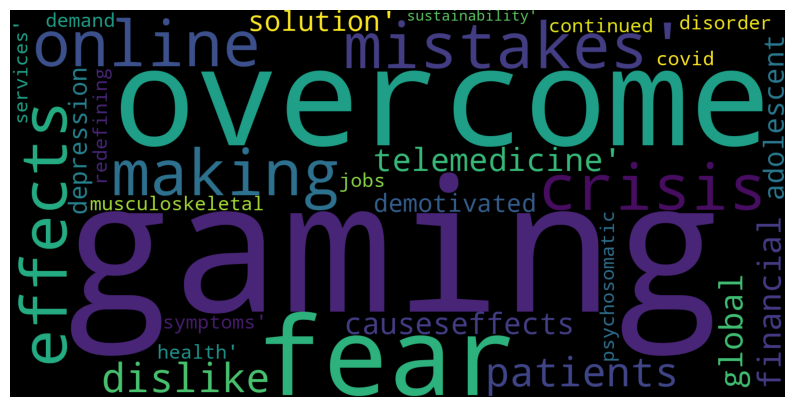

In [ ]:
data=df1[df1['overall_sentiment']=='negative']['cleaned_title']
plt.figure(figsize=[10,7])
wc=WordCloud(max_words=1000,width=1600,height=800,
             collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

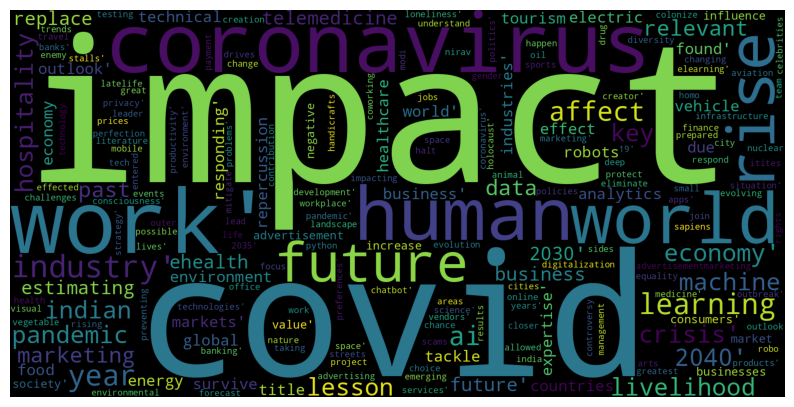

In [ ]:
data=df1[df1['overall_sentiment']=='natural']['cleaned_title']
plt.figure(figsize=[10,7])
wc=WordCloud(max_words=1000,width=1600,height=800,
             collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

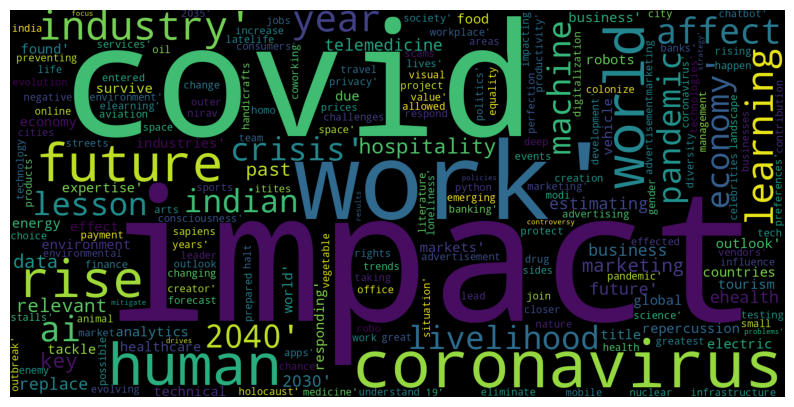

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

if not data.empty:
    plt.figure(figsize=[10, 7])
    wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
else:
    print("NO data for 'neutral' sentiment. Unable to generate WordCloud.")

In [ ]:

df1

,overall_sentiment,cleaned_title
0,natural,['rise telemedicine impact livelihood 2040']
1,natural,['rise ehealth impact humans year 2030']
2,natural,['rise ehealth impact humans year 2030']
3,natural,['rise telemedicine impact livelihood 2040']
4,natural,['rise telemedicine impact livelihood 2040']
...,...,...
109,natural,['coronavirus impact hospitality industry']
110,natural,['coronavirus impact energy markets']
111,natural,['key policies mitigate impacts covid 19 world...
112,natural,['marketing drives results focus problems']


In [ ]:
X=df1['cleaned_title']
y=df1['overall_sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [ ]:
X_train_dtm=vect.transform(X_train)
X_test_dtm=vect.transform(X_test)

In [ ]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1, 2), min_df=0.1, max_df=0.7, max_features=100)

In [ ]:
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
X_train_tfidf=tfidf_transformer.transform(X_train_dtm)

In [ ]:
X_train_tfidf

<85x227 sparse matrix of type '<class 'numpy.float64'>'
	with 428 stored elements in Compressed Sparse Row format>

In [ ]:
texts=df1['cleaned_title']
target=df1['overall_sentiment']

In [ ]:
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
vocab_length = len(tokenizer.word_index) + 1
vocab_length

309

In [ ]:
!pip install tensorflow



In [ ]:
 import tensorflow as tf
 from tensorflow.keras.preprocessing.sequence import pad_sequences
 from nltk.tokenize import word_tokenize

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def embed(corpus):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    return tokenizer.texts_to_sequences(corpus)

# Assuming df1 is your DataFrame containing 'cleaned_english_tweets' column
texts = df1["cleaned_title"]

# Use your 'embed' function to convert text sequences to integer sequences
train_padded_sentences = pad_sequences(
    embed(texts),
    padding='post'
)

train_padded_sentences

array([[  5,  34,   1, ...,   0,   0,   0],
       [  5,  35,   1, ...,   0,   0,   0],
       [  5,  35,   1, ...,   0,   0,   0],
       ...,
       [298, 299, 300, ...,   0,   0,   0],
       [ 46, 302, 303, ...,   0,   0,   0],
       [306, 307, 308, ...,   0,   0,   0]], dtype=int32)

In [ ]:
embeddings_dictionary=dict()
embedding_dim=100
#load Slove 100d embeddings
with open('glove.6B.100d.txt',encoding='utf8') as fp:
  for line in fp.reaadlines():
    records=liine.split()
    word=records[0]
    vector_dimensions=np.asarray(records[1:],dtype='float32')
    embeddings_dictionary [word]=vector_dimensions


FileNotFoundError: ignored

In [ ]:
import numpy as np

embeddings_dictionary = dict()
embedding_dim = 100
glove_file = 'glove.6B.100d.txt'

with open(glove_file, encoding='utf8') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions

FileNotFoundError: ignored

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [ ]:
nb.fit(X_train_dtm,y_train)

MultinomialNB()

In [ ]:
y_pred_class=nb.predict(X_test_dtm)
y_pred_prob=nb.predict_proba(X_test_dtm)[:,1]

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_class))

0.8275862068965517


In [ ]:
from sklearn .feature_extraction.text import TfidfTransformer,CountVectorizer

from sklearn.pipeline import Pipeline
pipe=Pipeline([
               ('bow',CountVectorizer()),
               ('tfid',TfidfTransformer()),
               ('model',MultinomialNB())
])

In [ ]:
pipe.fit(X_train,y_train)
y_pred_class=pipe.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_class))

0.8620689655172413


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
y_encoded=le.fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=101)

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb

pipe = Pipeline([
    ('bow', CountVectorizer()),  # Bag-of-words representation
    ('tfidf', TfidfTransformer()),  # TF-IDF transformation
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc'  # Corrected 'evel_metrics' to 'eval_metric'
    ))
])


In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='auc',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=80, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test,y_pred)
print('Test accuracy',acc)

Test accuracy 0.9130434782608695
